In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [22]:
os.environ["OMP_NUM_THREADS"] = "1"


In [4]:
# Load the dataset
data = pd.read_csv("C:/Users/venka/Downloads/Mall_Customers.csv")

# Display the first few rows
print(data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Select features (e.g., Age, Annual Income, Spending Score)
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

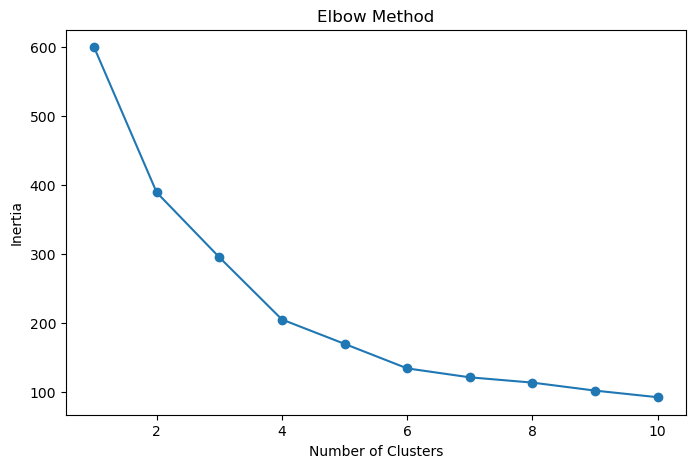

In [6]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [7]:
# Apply K-Means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42, algorithm='elkan')
kmeans.fit(X_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_


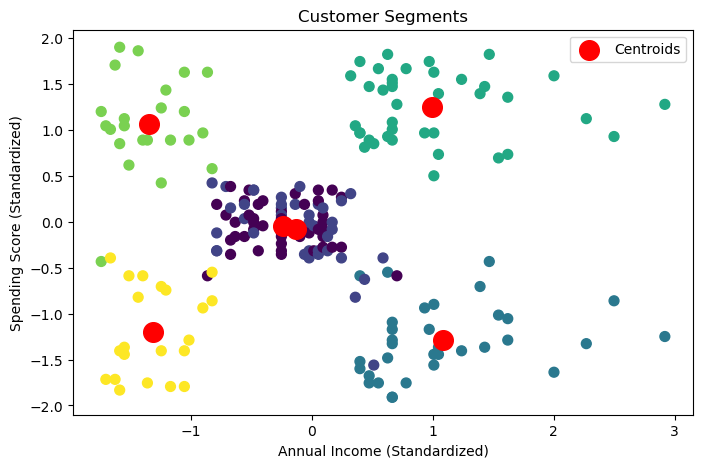

In [8]:
# 2D visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('Customer Segments')
plt.legend()
plt.show()


In [9]:
# Analyze clusters
cluster_analysis = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_analysis)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.777778  56.333333           54.266667               49.066667
1         91.307692  26.794872           57.102564               48.128205
2        165.303030  41.939394           88.939394               16.969697
3        162.000000  32.692308           86.538462               82.128205
4         22.130435  25.000000           25.260870               77.608696
5         23.190476  45.523810           26.285714               19.380952


In [33]:
new_data_point = pd.DataFrame([[25, 50, 60]], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

new_data_point_scaled = scaler.transform(new_data_point)

predicted_cluster = kmeans.predict(new_data_point_scaled)

print(f"The new data point belongs to Cluster {predicted_cluster[0]}")


The new data point belongs to Cluster 1


In [10]:
from sklearn.metrics import silhouette_score

# Assuming X_scaled is your preprocessed feature data and kmeans is your trained model
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.428


In [11]:
import pickle

# Save the KMeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save the Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and Scaler saved successfully using pickle.")


Model and Scaler saved successfully using pickle.
